In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans

In [2]:
df_mall = pd.read_csv('Mall_Customers.csv')
df_mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = df_mall.iloc[:,[3,4]].values

In [4]:
wss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=5)
    km.fit(X)
    wss.append(km.inertia_)
wss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30273.394312070028,
 24990.434310396893,
 21826.936303231643,
 19657.783608703947]

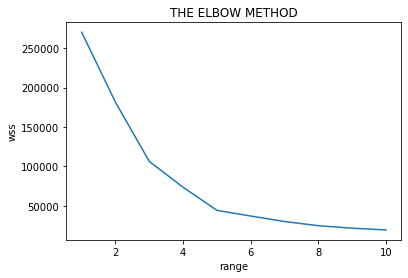

In [5]:
plt.plot(range(1,11),wss)
plt.title('THE ELBOW METHOD')
plt.xlabel('range')
plt.ylabel('wss')
plt.show()

In [7]:
km = KMeans(n_clusters=5,init='k-means++',max_iter=300,n_init=10,random_state=5)
y_means = km.fit_predict(X)
y_means

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

# 1. Age against Annual Income

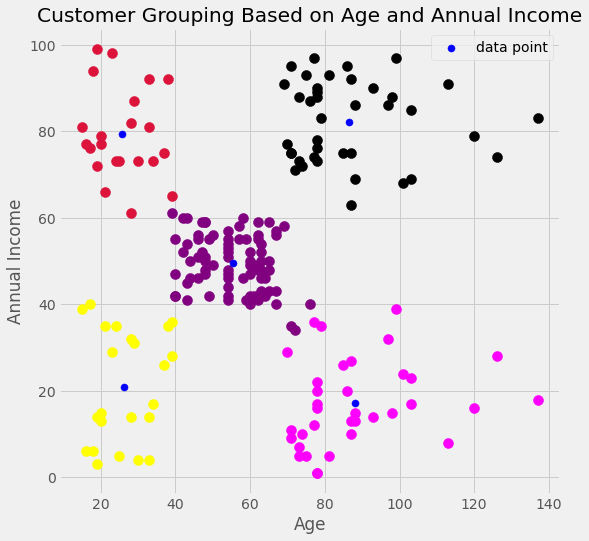

In [9]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,8))
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],s = 100,c='purple',label='')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s = 100,c='black',label='')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],s = 100,c='magenta',label='')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],s = 100,c='crimson',label='')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],s = 100,c='yellow',label='')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 50,c='blue',label='data point')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.title('Customer Grouping Based on Age and Annual Income')
plt.legend()
plt.show()

# 2. Age against Spending Score

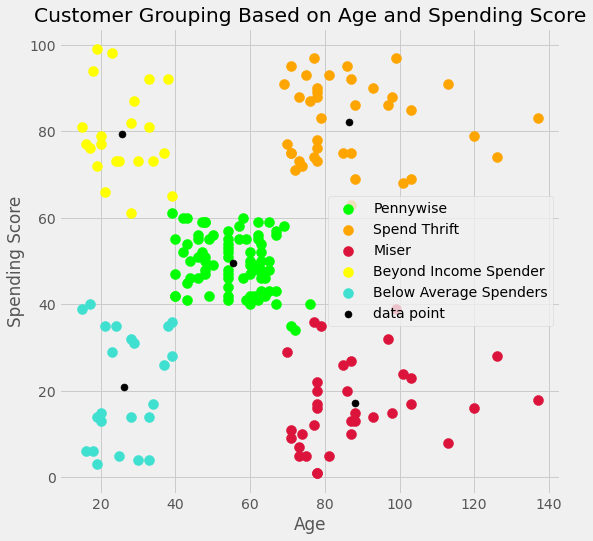

In [22]:
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')
plt.figure(figsize = (8,8))
plt.scatter(X[y_means == 0,0],X[y_means == 0,1],s = 100,c='lime',label='Pennywise')
plt.scatter(X[y_means == 1,0],X[y_means == 1,1],s = 100,c='orange',label='Spend Thrift')
plt.scatter(X[y_means == 2,0],X[y_means == 2,1],s = 100,c='crimson',label='Miser')
plt.scatter(X[y_means == 3,0],X[y_means == 3,1],s = 100,c='yellow',label='Beyond Income Spender')
plt.scatter(X[y_means == 4,0],X[y_means == 4,1],s = 100,c='turquoise',label='Below Average Spenders')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s = 50,c='black',label='data point')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Grouping Based on Age and Spending Score')
plt.legend()
plt.show()